In [1]:
import pandas as pd
headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian']
df = pd.read_csv("caesarian.csv", names = headers, index_col=None, skiprows=15)
df.head()

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [2]:
X = df.iloc[:,:-1]
X = X.values
Y = df.iloc[:,-1].values

In [3]:
print(X)

[[22  1  0  2  0]
 [26  2  0  1  0]
 [26  2  1  1  0]
 [28  1  0  2  0]
 [22  2  0  1  0]
 [26  1  1  0  0]
 [27  2  0  1  0]
 [32  3  0  1  0]
 [28  2  0  1  0]
 [27  1  1  1  0]
 [36  1  0  1  0]
 [33  1  1  0  0]
 [23  1  1  1  0]
 [20  1  0  1  1]
 [29  1  2  0  1]
 [25  1  2  0  0]
 [25  1  0  1  0]
 [20  1  2  2  0]
 [37  3  0  1  1]
 [24  1  2  0  1]
 [26  1  1  1  0]
 [33  2  0  0  1]
 [25  1  1  2  0]
 [27  1  0  0  1]
 [20  1  0  2  1]
 [18  1  0  1  0]
 [18  1  1  2  1]
 [30  1  0  1  0]
 [32  1  0  2  1]
 [26  2  1  1  1]
 [25  1  0  0  0]
 [40  1  0  1  1]
 [32  2  0  2  1]
 [27  2  0  1  1]
 [26  2  2  1  0]
 [28  3  0  2  0]
 [33  1  1  1  0]
 [31  2  2  1  0]
 [31  1  0  1  0]
 [26  1  2  0  1]
 [27  1  0  2  1]
 [19  1  0  1  0]
 [36  1  1  2  0]
 [22  1  0  1  0]
 [36  4  0  2  1]
 [28  3  0  1  1]
 [26  1  0  1  0]
 [32  2  0  2  1]
 [26  2  2  1  0]
 [29  2  0  0  1]
 [33  3  2  1  1]
 [21  2  1  0  1]
 [30  3  2  2  0]
 [35  1  1  0  0]
 [29  2  0  1  1]
 [25  2  0

In [4]:
print(Y)

[0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 1 0]


In [5]:
from sklearn import preprocessing
X1 = preprocessing.normalize(X)

In [6]:
print(X1)

[[0.99487439 0.04522156 0.         0.09044313 0.        ]
 [0.99632216 0.07664017 0.         0.03832008 0.        ]
 [0.99559146 0.07658396 0.03829198 0.03829198 0.        ]
 [0.9968264  0.03560094 0.         0.07120189 0.        ]
 [0.99487439 0.09044313 0.         0.04522156 0.        ]
 [0.99852398 0.03840477 0.03840477 0.         0.        ]
 [0.99658819 0.07382135 0.         0.03691067 0.        ]
 [0.99515266 0.09329556 0.         0.03109852 0.        ]
 [0.9968264  0.07120189 0.         0.03560094 0.        ]
 [0.99794872 0.03696106 0.03696106 0.03696106 0.        ]
 [0.99922929 0.02775637 0.         0.02775637 0.        ]
 [0.99908299 0.03027524 0.03027524 0.         0.        ]
 [0.99717646 0.0433555  0.0433555  0.0433555  0.        ]
 [0.99627096 0.04981355 0.         0.04981355 0.04981355]
 [0.99645179 0.03436041 0.06872081 0.         0.03436041]
 [0.99602384 0.03984095 0.07968191 0.         0.        ]
 [0.99840383 0.03993615 0.         0.03993615 0.        ]
 [0.98893635 0

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.25, random_state=42)

In [8]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60, 5) (20, 5) (60,) (20,)


In [9]:
#perceptron
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron(tol=1e-3, random_state=0)
perceptron_model.fit(X_train, Y_train)
y_pred_perceptron = perceptron_model.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred_perceptron)*100

60.0

In [10]:
#SVM
from sklearn import svm
svm_model = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred_svm)*100

60.0

In [11]:
#LVQ
import numpy as np
from neupy import algorithms

# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [2, 2], [1, 2]])
# y = np.array([0, 0, 0, 1, 1, 1])

lvqnet = algorithms.LVQ(n_inputs=5, n_classes=2)
lvqnet.train(X_train, Y_train, epochs=100)
pred = lvqnet.predict(X_test)
# lvqnet.predict(X_test)

/home/sinchan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sinchan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sinchan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sinchan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [12]:
cnt = 0
for i in range(len(Y_test)):
    if Y_test[i] == pred[i]:
        cnt+=1
print("accuracy:- ", (cnt/len(Y_test))*100)

accuracy:-  65.0


In [20]:
#SOM

from minisom import MiniSom
import numpy as np

data = X
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
labels = Y

In [21]:
print(labels)

[0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 1 0]


In [22]:
som = MiniSom(7, 7, 5, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")
data.shape


Training...

...ready!


(80, 5)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

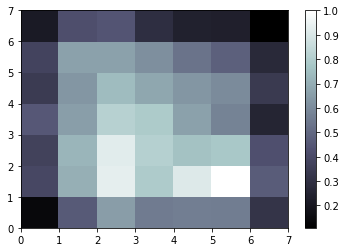

In [24]:
# Plotting the response for each pattern in the c-section dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

In [25]:
target = Y
t = np.zeros(len(target), dtype=int)
t[target == 0] = 0
t[target == 1] = 1


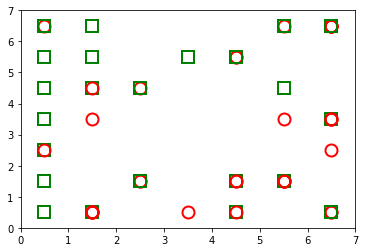

In [26]:
# use different colors and markers for each label
markers = ['o', 's']
colors = ['r', 'g'] 
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
    #print(t[cnt])
plt.axis([0, 7, 0, 7])
plt.show()